<a href="https://colab.research.google.com/github/vadhri/distibuted-optimization/blob/main/graph_consensus/fxts_consensus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install igraph

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.4/4.4 MB 20.5 MB/s eta 0:00:00


Converged at iteration 1396/1500 13.96


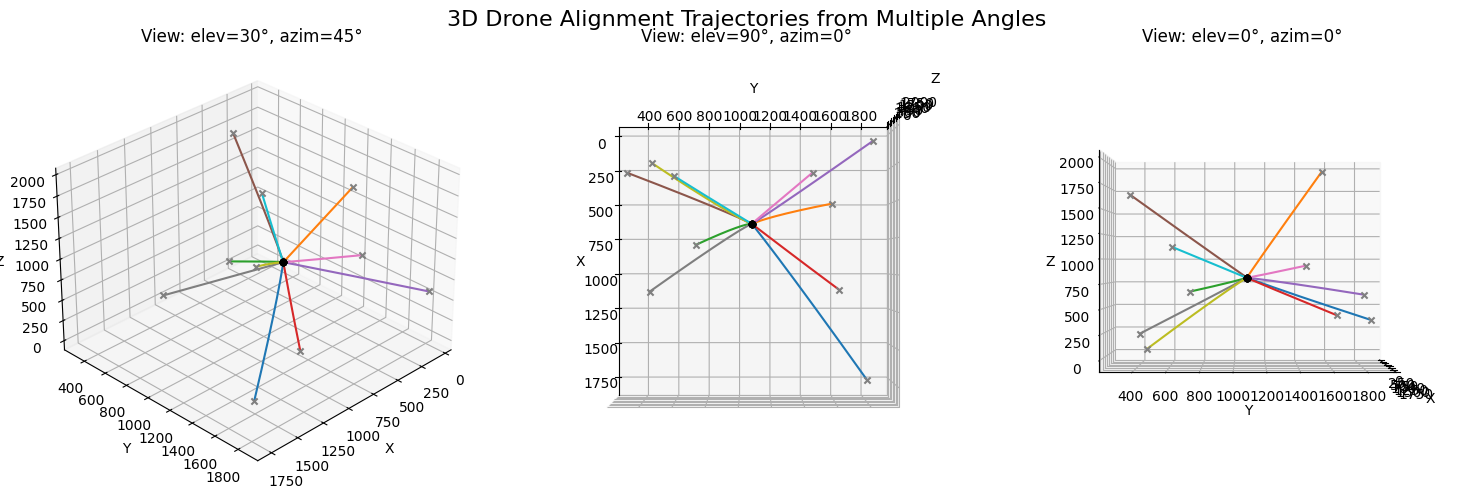

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import igraph as ig

# Generalized sign^p function
def sign_power(x: np.ndarray, p: float, eps: float = 1e-6) -> np.ndarray:
    norm = np.linalg.norm(x)
    return x / ((norm + eps) ** p)

def has_converged(positions, tol=1e-1):
    diffs = positions - positions.mean(axis=0)
    return np.all(np.linalg.norm(diffs, axis=1) < tol)

# Parameters
n = 10                    # number of drones
p, q = 0.6, 1.4          # powers for FxTS
dt = 0.01                # time step
T = 15.0                  # total time (fixed)
steps = int(T / dt)

# Initial 3D positions
positions = np.random.uniform(0, 2000, size=(n, 3))
history = [positions.copy()]

# Create a fully connected undirected graph using igraph
g = ig.Graph.Full(n)

# Simulation loop
for iter in range(steps):
    new_pos = positions.copy()
    for i in range(n):
        delta = np.zeros(3)
        neighbors = g.neighbors(i)
        for j in neighbors:
            diff = positions[i] - positions[j]
            delta += sign_power(diff, p) + sign_power(diff, q)
        new_pos[i] -= dt * delta
    positions = new_pos
    if has_converged(positions):
      print (f"Converged at iteration {iter}/{steps} {iter*dt}")
      break
    history.append(positions.copy())

# Convert history to NumPy array
history = np.array(history)  # shape: (steps+1, n, 3)

# Define camera views (elev, azim): front, side, top, isometric
view_angles = [
    (30, 45),    # Isometric view
    (90, 0),     # Top-down
    (0, 0),      # Front view (X-Z)
]

fig = plt.figure(figsize=(15, 5))
for idx, (elev, azim) in enumerate(view_angles):
    ax = fig.add_subplot(1, len(view_angles), idx + 1, projection='3d')
    for i in range(n):
        ax.plot(history[:, i, 0], history[:, i, 1], history[:, i, 2], label=f'Drone {i}')
        ax.scatter(history[0, i, 0], history[0, i, 1], history[0, i, 2], c='gray', marker='x')   # initial
        ax.scatter(history[-1, i, 0], history[-1, i, 1], history[-1, i, 2], c='black', marker='o')  # final

    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"View: elev={elev}°, azim={azim}°")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.grid(True)

plt.suptitle("3D Drone Alignment Trajectories from Multiple Angles", fontsize=16)
plt.tight_layout()
plt.show()


Star graph - less connectivty and slow convergence

Converged at iteration 11610/12000 116.10000000000001


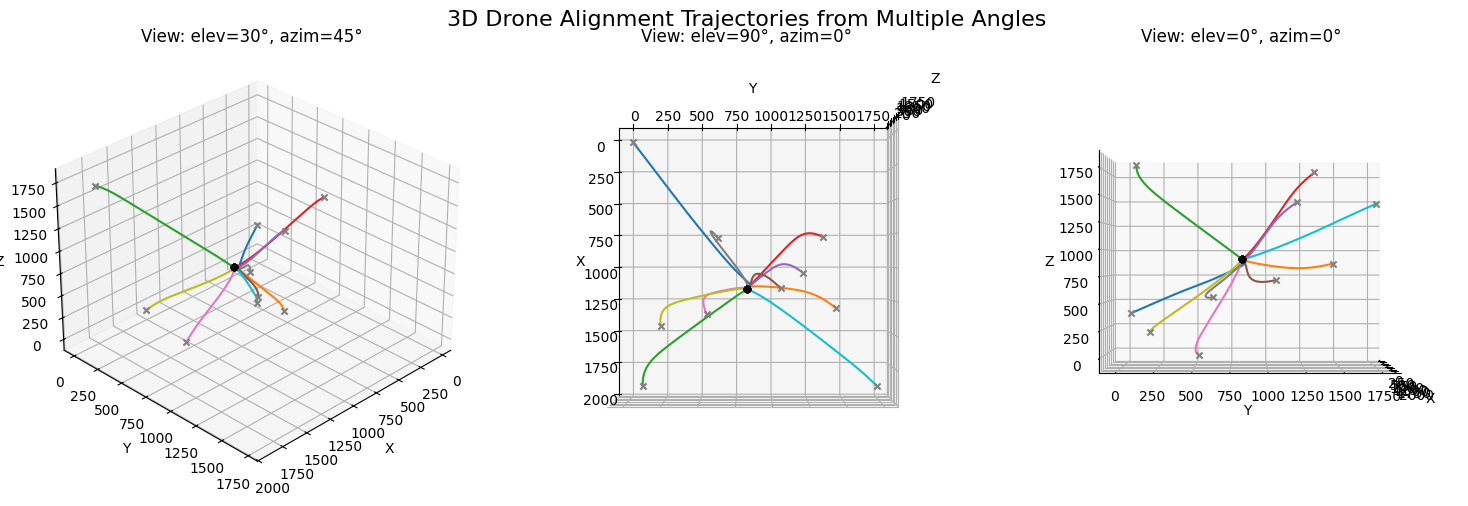

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import igraph as ig

# Generalized sign^p function
def sign_power(x: np.ndarray, p: float, eps: float = 1e-6) -> np.ndarray:
    norm = np.linalg.norm(x)
    return x / ((norm + eps) ** p)

def has_converged(positions, tol=1e-1):
    diffs = positions - positions.mean(axis=0)
    return np.all(np.linalg.norm(diffs, axis=1) < tol)

# Parameters
n = 10                    # number of drones
p, q = 0.6, 1.4          # powers for FxTS
dt = 0.01                # time step
T = 120.0                  # total time (fixed)
steps = int(T / dt)

# Initial 3D positions
positions = np.random.uniform(0, 2000, size=(n, 3))
history = [positions.copy()]

# Create a fully connected undirected graph using igraph
g = ig.Graph.Star(n)

# Simulation loop
for iter in range(steps):
    new_pos = positions.copy()
    for i in range(n):
        delta = np.zeros(3)
        neighbors = g.neighbors(i)
        for j in neighbors:
            diff = positions[i] - positions[j]
            delta += sign_power(diff, p) + sign_power(diff, q)
        new_pos[i] -= dt * delta
    positions = new_pos
    if has_converged(positions):
      print (f"Converged at iteration {iter}/{steps} {iter*dt}")
      break
    history.append(positions.copy())

# Convert history to NumPy array
history = np.array(history)  # shape: (steps+1, n, 3)

# Define camera views (elev, azim): front, side, top, isometric
view_angles = [
    (30, 45),    # Isometric view
    (90, 0),     # Top-down
    (0, 0),      # Front view (X-Z)
]

fig = plt.figure(figsize=(15, 5))
for idx, (elev, azim) in enumerate(view_angles):
    ax = fig.add_subplot(1, len(view_angles), idx + 1, projection='3d')
    for i in range(n):
        ax.plot(history[:, i, 0], history[:, i, 1], history[:, i, 2], label=f'Drone {i}')
        ax.scatter(history[0, i, 0], history[0, i, 1], history[0, i, 2], c='gray', marker='x')   # initial
        ax.scatter(history[-1, i, 0], history[-1, i, 1], history[-1, i, 2], c='black', marker='o')  # final

    ax.view_init(elev=elev, azim=azim)
    ax.set_title(f"View: elev={elev}°, azim={azim}°")
    ax.set_xlabel("X")
    ax.set_ylabel("Y")
    ax.set_zlabel("Z")
    ax.grid(True)

plt.suptitle("3D Drone Alignment Trajectories from Multiple Angles", fontsize=16)
plt.tight_layout()
plt.show()
